#Stockwell Transform implementation

In [ ]:
!apt-get install libfftw3-dev python3-dev
!pip install numpy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libfftw3-bin libfftw3-long3 libfftw3-quad3 libfftw3-single3
Suggested packages:
  libfftw3-doc
The following NEW packages will be installed:
  libfftw3-bin libfftw3-dev libfftw3-long3 libfftw3-quad3 libfftw3-single3
0 upgraded, 5 newly installed, 0 to remove and 34 not upgraded.
Need to get 3,766 kB of archives.
After this operation, 21.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-long3 amd64 3.3.7-1 [308 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-quad3 amd64 3.3.7-1 [552 kB]
Get:3 http://archive.ubuntu.com/ubuntu bion

In [ ]:
!pip install stockwell

  Created wheel for stockwell: filename=stockwell-0.1.0-cp37-cp37m-linux_x86_64.whl size=31811 sha256=c37cc0a75887e8d8d0d7679bf65c7f28e411a10534a778dfd5cfeff4340df08e
  Stored in directory: /root/.cache/pip/wheels/65/41/fb/f42cf38abb80b174bd36e3e25e178c2a3a4a5148ef28c86180
Successfully built stockwell


In [ ]:
import numpy as np
import stockwell.smt as smt
import stockwell
import os
import matplotlib.pyplot as plt
import glob
import scipy.io

In [ ]:
os.chdir('/content/drive/MyDrive/Dissertation/Case Western Reserve University Data/12k Drive End Bearing Fault Data/12KHz DE/Ball/') #your directory
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1ANBL-GmmusWv_4wg7iO8ubf4orC3bIYv/Dissertation/Case Western Reserve University Data/12k Drive End Bearing Fault Data/12KHz DE/Ball'

In [ ]:
#os.chdir('/content/drive/MyDrive/Dissertation/MFS/MFS 25/14 Samples/OUTER_MAT/')
def load_mat(f):
    ''' Load the processed mat file and return the horizontal and vertical vibration signal data in it '''
    bearing_vibration_signal = scipy.io.loadmat(f)
    h = bearing_vibration_signal['H']
    return h

In [ ]:
folder = '/content/drive/MyDrive/Dissertation/Case Western Reserve University Data/12k Drive End Bearing Fault Data/12KHz DE/Ball/'
bearing_files = sorted(glob.glob('%s*.mat' % (folder)))
bearing_files

['/content/drive/MyDrive/Dissertation/Case Western Reserve University Data/12k Drive End Bearing Fault Data/12KHz DE/Ball/0070.mat',
 '/content/drive/MyDrive/Dissertation/Case Western Reserve University Data/12k Drive End Bearing Fault Data/12KHz DE/Ball/0071.mat',
 '/content/drive/MyDrive/Dissertation/Case Western Reserve University Data/12k Drive End Bearing Fault Data/12KHz DE/Ball/0072.mat',
 '/content/drive/MyDrive/Dissertation/Case Western Reserve University Data/12k Drive End Bearing Fault Data/12KHz DE/Ball/0073.mat',
 '/content/drive/MyDrive/Dissertation/Case Western Reserve University Data/12k Drive End Bearing Fault Data/12KHz DE/Ball/0140.mat',
 '/content/drive/MyDrive/Dissertation/Case Western Reserve University Data/12k Drive End Bearing Fault Data/12KHz DE/Ball/0141.mat',
 '/content/drive/MyDrive/Dissertation/Case Western Reserve University Data/12k Drive End Bearing Fault Data/12KHz DE/Ball/0142.mat',
 '/content/drive/MyDrive/Dissertation/Case Western Reserve University

In [ ]:
x = bearing_files[4]
yyy = load_mat(x)

In [ ]:
yyy.shape # determine the shape

In [ ]:
y1 = yyy[:,0] # only the one dimensional signal taken

In [ ]:
#y = np.real(y) # removing complex terms from the signal if present

In [ ]:
y = y1[1:12000] # windowing the signal as per requirement

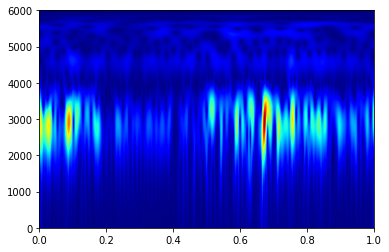

In [ ]:
Fs = 12000 # frequency
P = 1.0/Fs # time steps
T = 1.0 # max time
t = np.arange(0,T,P) # generate a time sequence
L = len(t)
#twopi = 2*np.pi

# create a list of different sin waves at different frequencies
#ss = [np.sin(twopi*f*t) for f in [5,10,20,30,50]]
#y = np.zeros(L,dtype='float64')

#for s in ss:
#    y += s

# get the stockwell transform
sy = smt.st(y)
rsy = abs(sy)

f = plt.figure()

def plotspec(psx, fs, lofreq=None, hifreq=None, t1=None, t2=None):
    extent = [0,psx.shape[1], 0.0, fs/2.0]
    if t1 != None and t2 != None:
        extent[0] = t1
        extent[1] = t2
    if lofreq != None:
        extent[2] = lofreq
    if hifreq != None:
        extent[3] = hifreq

    return plt.imshow(psx, extent=extent, aspect='auto', cmap="jet")

plotspec(rsy, fs=Fs, t1=0, t2=T)
plt.show()